In [1]:
import sys,os,time

import tables as tb
import yaml
import numpy as np
from matplotlib import colors
norm = colors.LogNorm()
import matplotlib.pyplot as plt

import tjmonopix.tjmonopix
import tjmonopix.scans.source_scan as source_scan
import tjmonopix.scans.th_scan as th_scan

DUtoe=20

In [2]:
#HV 2 V, psub,well = -6V 
#
chip=tjmonopix.tjmonopix.TJMonoPix(conf="../tjmonopix/tjmonopix_mio3.yaml",no_power_reset=False) #con la configurazione settata da errore. Controllare se le configurazioni sono le stesse
#vecchia conf: /home/user/workspace/tjmonopix/tjmonopix_30/tjmonopix/tjmonopix_mio3.yaml"
chip.init(fl="EN_PMOS")  # Default EN_PMOS


2022-03-15 15:45:41,719 [INFO ] (MainThread) GPAC: power reset
2022-03-15 15:45:43,592 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card (GPAC) with ID 3
2022-03-15 15:45:43,839 [INFO ] (MainThread) Found board 0 running firmware version 0.0
2022-03-15 15:45:44,094 [INFO ] (MainThread) ibias = 45
2022-03-15 15:45:44,108 [INFO ] (MainThread) ibias = 503.125 nA
2022-03-15 15:45:44,842 [INFO ] (MainThread) {'VPC [V]': 1.2998506463536463, 'VDDA_DAC [mA]': 3.002966091804109, 'VDDP [V]': 1.8069793514056223, 'VDDP OC': False, 'VDDA [mA]': 49.64478938256647, 'VDDD [V]': 1.8015140363636364, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.5001542395802099, 'VDDP [mA]': 128.39714805315754, 'BiasSF [V]': 1.054278396657015, 'VDDD OC': False, 'VPC [mA]': -0.6349971973268547, 'VPCSWSF [mA]': 0.10755337355524394, 'VDDA [V]': 1.8058565495495498, 'VDDA OC': False, 'VDDA_DAC [V]': 1.8045472377622378, 'BiasSF [mA]': 0.10109892318840588}


In [3]:
chip.get_temperature()

# reset configuration
chip.default_conf()
chip.reset_ibias()

2022-03-15 15:45:51,694 [INFO ] (MainThread) Temperature (C): 24.472279
2022-03-15 15:45:51,756 [INFO ] (MainThread) Temperature (C): 24.472279
2022-03-15 15:45:51,809 [INFO ] (MainThread) Temperature (C): 24.472279
2022-03-15 15:45:51,872 [INFO ] (MainThread) Temperature (C): 24.491060
2022-03-15 15:45:51,941 [INFO ] (MainThread) Temperature (C): 24.491060
2022-03-15 15:45:51,994 [INFO ] (MainThread) Temperature (C): 24.509857
2022-03-15 15:45:52,058 [INFO ] (MainThread) Temperature (C): 24.528669
2022-03-15 15:45:52,111 [INFO ] (MainThread) Temperature (C): 24.721427
2022-03-15 15:45:52,174 [INFO ] (MainThread) Temperature (C): 24.721427
2022-03-15 15:45:52,243 [INFO ] (MainThread) Temperature (C): 24.528669
2022-03-15 15:45:52,257 [INFO ] (MainThread) ibias = 45
2022-03-15 15:45:52,273 [INFO ] (MainThread) ibias = 503.125 nA


In [4]:
####### CONFIGURE THE FRONT END ######
# INPUT baseline
chip.set_vreset_dacunits(43,1) #1V
# OUTPUT BASELINE
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias
# INOUT RESET rate
chip.set_ireset_dacunits(2,0,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01
# OUTPUT RESET rate
chip.set_ithr_dacunits(10,1) #680pA
# BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(40,1) #500nA
# DC current of Amp, OUTPUT RISE TIME
chip.set_ibias_dacunits(45,1) #500nA
chip.write_conf()

2022-03-15 15:45:56,753 [INFO ] (MainThread) vreset = 1.1644488189V
2022-03-15 15:45:56,769 [INFO ] (MainThread) icasn = 0
2022-03-15 15:45:56,785 [INFO ] (MainThread) icasn = 4.375 nA
2022-03-15 15:45:56,801 [INFO ] (MainThread) ireset = 2 low leakage mode
2022-03-15 15:45:56,825 [INFO ] (MainThread) ireset = 0.001025390625nA, low leakage mode
2022-03-15 15:45:56,842 [INFO ] (MainThread) ithr = 10
2022-03-15 15:45:56,858 [INFO ] (MainThread) ithr = 1.50390625 nA
2022-03-15 15:45:56,872 [INFO ] (MainThread) idb = 40
2022-03-15 15:45:56,888 [INFO ] (MainThread) idb = 717.5 nA
2022-03-15 15:45:56,904 [INFO ] (MainThread) ibias = 45
2022-03-15 15:45:56,927 [INFO ] (MainThread) ibias = 503.125 nA


Enable MASKH 50
Got 0 hits, total noisy pixels: 0
Enable MASKH 100
Got 20319 hits, total noisy pixels: 3
Enable MASKH 150
Got 5 hits, total noisy pixels: 5
Enable MASKH 200
Got 2190 hits, total noisy pixels: 8
Enable MASKH 223
Got 487 hits, total noisy pixels: 17
Enable MASKV 50
Got 2 hits, total noisy pixels: 17
Enable MASKV 100
Got 3 hits, total noisy pixels: 18
Enable MASKV 111
Got 0 hits, total noisy pixels: 18
Enable MASKD 50
Got 4 hits, total noisy pixels: 19
Enable MASKD 100
Got 0 hits, total noisy pixels: 19
Enable MASKD 150
Got 0 hits, total noisy pixels: 19
Enable MASKD 200
Got 0 hits, total noisy pixels: 19
Enable MASKD 250
Got 1 hits, total noisy pixels: 19
Enable MASKD 300
Got 0 hits, total noisy pixels: 19
Enable MASKD 350
Got 0 hits, total noisy pixels: 19
Enable MASKD 400
Got 0 hits, total noisy pixels: 19
Enable MASKD 447
Got 0 hits, total noisy pixels: 19
Checking again after masking
Got 0 hits, total noisy pixels: 19
Noisy pixels: 19
Enabled pixels: 25056
Disabled pi

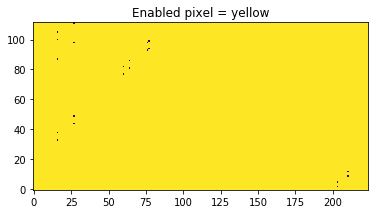

In [5]:
#### enable pixels and mask noisy pixels
chip.set_monoread()
noisy=chip.auto_mask()

mask=chip.get_pixel_status(mask=None,mode="all")
plt.imshow(chip.get_pixel_status(mask=mask,mode="preamp")[3,:,:],
           interpolation="none",origin="bottomleft")
plt.title("Enabled pixel = yellow");

In [6]:
### check power status (VDDD < several mA, VDDP roughly 80mA)
chip.get_power_status()

{'BiasSF [V]': 1.0587793989997367,
 'BiasSF [mA]': 0.10059447096451782,
 'VDDA OC': False,
 'VDDA [V]': 1.7998621891891895,
 'VDDA [mA]': 42.04609713367839,
 'VDDA_DAC OC': False,
 'VDDA_DAC [V]': 1.8045472377622378,
 'VDDA_DAC [mA]': 2.502471747485684,
 'VDDD OC': False,
 'VDDD [V]': 1.8015140363636364,
 'VDDD [mA]': 2.820288999038665e-08,
 'VDDP OC': False,
 'VDDP [V]': 1.8059798142570278,
 'VDDP [mA]': 142.99917665269473,
 'VPC [V]': 1.2998506463536463,
 'VPC [mA]': -0.643497159881765,
 'VPCSWSF [V]': 0.5001542395802099,
 'VPCSWSF [mA]': -0.014006944172376978}

In [7]:
### select one pixel
col=4
row=50
chip.enable_injection(chip.fl_n, col, row)
#chip.enable_pixel(chip.fl_n,col,row) 
#chip.enable_hitor(chip.fl_n,col,row)
mask=chip.get_pixel_status(mask=None,mode="all")
print "preamp of [%d,%d]:"%(col,row),chip.get_pixel_status(mask=mask,mode="preamp")[chip.fl_n, col, row]
print "inj of [%d,%d]:"%(col,row),chip.get_pixel_status(mask=mask,mode="inj")[chip.fl_n, col, row]
print "hitor of [%d,%d]:"%(col,row),chip.get_pixel_status(mask=mask,mode="mon")[chip.fl_n, col, row]

preamp of [4,50]: True
inj of [4,50]: True
hitor of [4,50]: False


In [8]:
### (optional) inject 1 pixel. it is good idea to run this once/twice.
chip.set_inj_all(inj_n=1000,inj_phase=0)
#chip.reset_ibias()
chip.set_monoread()
chip.inject()
time.sleep(1)
dat=chip.interpret_data(chip['fifo'].get_data())
print "n of data", len(dat)
if len(dat)!=0:
    uni,cnt=np.unique(dat[["col",'row']], return_counts=True)
    arg=np.argsort(cnt)
    for a in arg[::-1]:
        print uni[a],cnt[a]

2022-03-15 15:46:22,846 [INFO ] (MainThread) vl = 1.00862204724V
2022-03-15 15:46:22,861 [INFO ] (MainThread) vh = 1.50468503937V


n of data 1001
(4, 50) 1000
(28, 60) 1


2022-03-15 15:47:23,377 [INFO ] (MainThread) idb = 80
2022-03-15 15:47:23,398 [INFO ] (MainThread) idb = 1417.5 nA
2022-03-15 15:47:23,414 [INFO ] (MainThread) vl = 1.00862204724V
2022-03-15 15:47:23,430 [INFO ] (MainThread) vh = 1.50468503937V
2022-03-15 15:47:23,450 [INFO ] (MainThread) Initializing ThScan
2022-03-15 15:47:24,032 [INFO ] (MainThread) Power status: {'VPC [V]': 1.2998506463536463, 'VDDA_DAC [mA]': 3.002966091804109, 'VDDP [V]': 1.8059798142570278, 'VDDP OC': False, 'VDDA [mA]': 41.032938167159976, 'VDDD [V]': 1.8015140363636364, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.5001542395802099, 'VDDP [mA]': 142.99917665269473, 'BiasSF [V]': 1.0607798444853909, 'VDDD OC': False, 'VPC [mA]': -0.6399971753003314, 'VPCSWSF [mA]': -0.13856875122660584, 'VDDA [V]': 1.7998621891891895, 'VDDA OC': False, 'VDDA_DAC [V]': 1.8045472377622378, 'BiasSF [mA]': 0.10059447096451782}
2022-03-15 15:47:24,115 [INFO ] (MainThread) Temperature (C): 27.833096
2022-

sleeping


2022-03-15 15:47:27,292 [INFO ] (MainThread) Set timestamp: src=inj
2022-03-15 15:47:27,914 [INFO ] (MainThread) Starting FIFO readout
2022-03-15 15:47:30,167 [INFO ] (MainThread) Stopped FIFO readout
2022-03-15 15:47:30,181 [INFO ] (MainThread) g=None, dat=155271
2022-03-15 15:47:30,197 [INFO ] (MainThread) Recived words: 155271
2022-03-15 15:47:30,220 [INFO ] (MainThread) Data queue size: 0
2022-03-15 15:47:30,236 [INFO ] (MainThread) SRAM FIFO size: 0
2022-03-15 15:47:30,250 [INFO ] (MainThread) Channel:                     TDC | DATA_RX | TLU | TIMESTAMP
2022-03-15 15:47:30,266 [INFO ] (MainThread) Discard counter:             None |       0 |   0 |         0
2022-03-15 15:47:30,836 [INFO ] (MainThread) Power status: {'VPC [V]': 1.2998506463536463, 'VDDA_DAC [mA]': 3.002966091804109, 'VDDP [V]': 1.8069793514056223, 'VDDP OC': False, 'VDDA [mA]': 40.526358683900774, 'VDDD [V]': 1.8015140363636364, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.50015423958

0 155270 100.000% 0.000s 51757hits 0errs
data (inj_n 1000,inj_loop 35): INJ=35000 MONO=16757 MON=0
0 51757 100.000% 0.786s 16757hits 0errs
delete_noninjected from 16757 to 16757 to 16757 100.000 percent
delete_cetainvalue from 16757 to 16757 100.000 percent
fit mu=3.550e+02(17.7491DU) sigma=9.261e+00(0.4631DU)


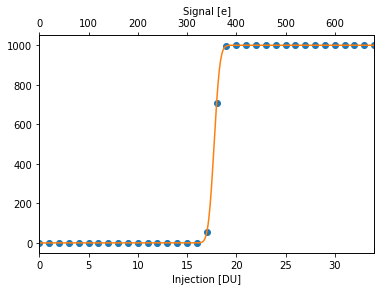

In [11]:
### S-curve
chip.set_idb_dacunits(80,1) #500nA
from tjmonopix.scans.injection_scan import InjectionScan
reload(tjmonopix.scans.injection_scan)
chip.set_inj_all(inj_n=1000,inj_phase=0)
reload(th_scan)

scan=th_scan.ThScan(chip)
scan.start(rowlist=np.arange(row,row+1,1), ## list of rows
           collist=np.arange(col,col+1,1), ## list of columns
           n_mask_col=1,                   ## maximum number of columns which are injected at once
           injlist=np.arange(0,35)        ## scan values of test pulse amplitude in DU
          )                               ## do not change
scan.analyze(scan.output_filename)
scan.stop()
fraw=scan.output_filename+'.h5'
fev=fraw[:-7]+'ev.h5'

with tb.open_file(fev) as f:
    cnts=f.root.Cnts[:]
    inj=f.root.ScurveFit.attrs.injlist
    fit=f.root.ScurveFit[:]
    tot = f.root.Hits.col("tot")
fig,ax=plt.subplots(ncols=1,nrows=1,sharey=True)
ax=[ax]
cnts=cnts[np.bitwise_and(cnts['col']==col,cnts['row']==row)]
fit=fit[np.bitwise_and(fit['col']==col,fit['row']==row)][0]
cnt=np.zeros(len(inj))
 
tot = tot & 0x3F
#tot=np.average((cnts["te"]-cnts["le"]) & 0x3F)
#
#x = chip['fifo'].get_data()
#ix = chip.interpret_data(x)
#ix_inj=ix[np.bitwise_and(ix["col"]==col,ix["row"]==row)]
#print inj,len(ix),len(ix_inj),np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)
#cnt[inj_i]=len(ix_inj)
#tot[inj_i]=np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)
#
for c in cnts:
    cnt[np.argwhere(inj==c["inj"])[0][0]]=c['cnt']
x,y=tjmonopix.analysis.utils.scurve_from_fit(th=inj,n=500,
        reverse=False,A_fit=fit["A"],mu_fit=fit["mu"],sigma_fit=fit['sigma'])
ax[0].plot(inj,cnt,"o")
ax[0].plot(x,y,"-")
ax2=ax[0].twiny()
ax[0].set_xbound(np.min(inj),np.max(inj))
ax2.set_xbound(np.min(inj)*DUtoe,np.max(inj)*DUtoe)
ax[0].set_xlabel("Injection [DU]")
ax2.set_xlabel("Signal [e]")
print "fit mu=%.3e(%.4fDU)"%(fit["mu"]*DUtoe,fit["mu"]),
print "sigma=%.3e(%.4fDU)"%(fit["sigma"]*DUtoe,fit["sigma"])


#
#ax3=ax.twinx()
#ax3.plot(injlist,tot,"C1x",label="ToT")

2022-03-15 15:49:04,500 [INFO ] (MainThread) idb = 80
2022-03-15 15:49:04,516 [INFO ] (MainThread) idb = 1417.5 nA
2022-03-15 15:49:04,532 [INFO ] (MainThread) vl = 1.00862204724V
2022-03-15 15:49:04,548 [INFO ] (MainThread) vh = 1.50468503937V
2022-03-15 15:49:04,556 [INFO ] (MainThread) Initializing ThScan
2022-03-15 15:49:05,134 [INFO ] (MainThread) Power status: {'VPC [V]': 1.2998506463536463, 'VDDA_DAC [mA]': 2.502471747485684, 'VDDP [V]': 1.8059798142570278, 'VDDP OC': False, 'VDDA [mA]': 41.032938167159976, 'VDDD [V]': 1.8015140363636364, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.5001542395802099, 'VDDP [mA]': 142.99917665269473, 'BiasSF [V]': 1.0612799558568045, 'VDDD OC': False, 'VPC [mA]': -0.020999902183925806, 'VPCSWSF [mA]': -0.0650322627247117, 'VDDA [V]': 1.7998621891891895, 'VDDA OC': False, 'VDDA_DAC [V]': 1.8045472377622378, 'BiasSF [mA]': 0.10109892318840588}
2022-03-15 15:49:05,217 [INFO ] (MainThread) Temperature (C): 28.666524
2022

sleeping


2022-03-15 15:49:08,401 [INFO ] (MainThread) Set timestamp: src=inj
2022-03-15 15:49:09,032 [INFO ] (MainThread) Starting FIFO readout
2022-03-15 15:49:11,237 [INFO ] (MainThread) Stopped FIFO readout
2022-03-15 15:49:11,269 [INFO ] (MainThread) g=None, dat=155130
2022-03-15 15:49:11,285 [INFO ] (MainThread) Recived words: 155130
2022-03-15 15:49:11,299 [INFO ] (MainThread) Data queue size: 0
2022-03-15 15:49:11,322 [INFO ] (MainThread) SRAM FIFO size: 0
2022-03-15 15:49:11,338 [INFO ] (MainThread) Channel:                     TDC | DATA_RX | TLU | TIMESTAMP
2022-03-15 15:49:11,354 [INFO ] (MainThread) Discard counter:             None |       0 |   0 |         0
2022-03-15 15:49:11,970 [INFO ] (MainThread) Power status: {'VPC [V]': 1.2993515804695306, 'VDDA_DAC [mA]': 2.502471747485684, 'VDDP [V]': 1.8059798142570278, 'VDDP OC': False, 'VDDA [mA]': 41.032938167159976, 'VDDD [V]': 1.8015140363636364, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.50015423958

0 155129 100.000% 0.000s 51710hits 0errs
data (inj_n 1000,inj_loop 35): INJ=35000 MONO=16710 MON=0
0 51710 100.000% 0.802s 16710hits 0errs
delete_noninjected from 16710 to 16710 to 16710 100.000 percent
delete_cetainvalue from 16710 to 16710 100.000 percent
fit mu=3.560e+02(17.7979DU) sigma=8.799e+00(0.4399DU)


ValueError: x and y must have same first dimension, but have shapes (35L,) and (16710L,)

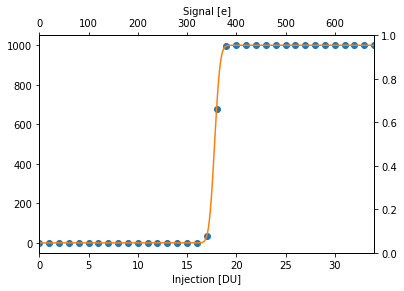

In [14]:
### S-curve
chip.set_idb_dacunits(80,1) #500nA
from tjmonopix.scans.injection_scan import InjectionScan
reload(tjmonopix.scans.injection_scan)
chip.set_inj_all(inj_n=1000,inj_phase=0)
reload(th_scan)

scan=th_scan.ThScan(chip)
scan.start(rowlist=np.arange(row,row+1,1), ## list of rows
           collist=np.arange(col,col+1,1), ## list of columns
           n_mask_col=1,                   ## maximum number of columns which are injected at once
           injlist=np.arange(0,35)        ## scan values of test pulse amplitude in DU
          )                               ## do not change
scan.analyze(scan.output_filename)
scan.stop()
fraw=scan.output_filename+'.h5'
fev=fraw[:-7]+'ev.h5'

with tb.open_file(fev) as f:
    cnts=f.root.Cnts[:]
    inj=f.root.ScurveFit.attrs.injlist
    fit=f.root.ScurveFit[:]
    tot = f.root.Hits.col("tot")
fig,ax=plt.subplots(ncols=1,nrows=1,sharey=True)
ax=[ax]
cnts=cnts[np.bitwise_and(cnts['col']==col,cnts['row']==row)]
fit=fit[np.bitwise_and(fit['col']==col,fit['row']==row)][0]
cnt=np.zeros(len(inj))
 
tot = tot & 0x3F
for c in cnts:
    cnt[np.argwhere(inj==c["inj"])[0][0]]=c['cnt']
x,y=tjmonopix.analysis.utils.scurve_from_fit(th=inj,n=500,
        reverse=False,A_fit=fit["A"],mu_fit=fit["mu"],sigma_fit=fit['sigma'])
ax[0].plot(inj,cnt,"o")
ax[0].plot(x,y,"-")
ax2=ax[0].twiny()
ax[0].set_xbound(np.min(inj),np.max(inj))
ax2.set_xbound(np.min(inj)*DUtoe,np.max(inj)*DUtoe)
ax[0].set_xlabel("Injection [DU]")
ax2.set_xlabel("Signal [e]")
print "fit mu=%.3e(%.4fDU)"%(fit["mu"]*DUtoe,fit["mu"]),
print "sigma=%.3e(%.4fDU)"%(fit["sigma"]*DUtoe,fit["sigma"])

ax3=ax[0].twinx()
ax[0].plot(inj,tot,"C1x",label="ToT")

In [ ]:
## Threshold scan 1col=~1.5min
chip.set_inj_all(inj_n=100,inj_phase=0)
reload(th_scan)
scan=th_scan.ThScan(chip)
scan.start(rowlist= np.arange(0,10,1), ## list of rows
           collist= [20], #np.arange(0,112,10), ## list of columns change here (0,112,1) for full scan
           n_mask_col=1,                   ## max number of columns to be injected
           injlist=np.arange(0,35),        ## scan values of test pulse amplitude in DU
           debug=4)                        
scan.analyze(scan.output_filename)
scan.stop()
fraw=scan.output_filename+'.h5'
fev=fraw[:-7]+'ev.h5'

In [ ]:
with tb.open_file(fev) as f:
    cnts=f.root.Cnts[:]
    inj=f.root.ScurveFit.attrs.injlist

fig,ax=plt.subplots(ncols=1,nrows=1,sharey=True)
hist=ax.hist2d(cnts['inj']*DUtoe,cnts['cnt'], bins=[inj*DUtoe,np.arange(100)],norm=norm)
cb=fig.colorbar(hist[3], ax=ax)
cb.set_label("# of pixels")
ax.set_ylabel("Count")
ax.set_xlabel("Signal [e]");

#Da controllare cosa viene salvato nella variabile Cnts della tabella root.Cnts. Problema già visto (soluzione possibile: controllare #dei tot)


In [ ]:
with tb.open_file(fev) as f:
    fit=f.root.ScurveFit[:]
DUtoe=20.
fig,ax=plt.subplots(ncols=2,nrows=1,sharey=True)
ax[0].hist(fit['mu']*DUtoe,bins=np.arange(0,30,0.5)*DUtoe,histtype="step")
ax[1].hist(fit['sigma']*DUtoe,bins=np.arange(0,3,0.05)*DUtoe,histtype="step")
ax[0].set_ylabel("# of pix")
ax[0].set_xlabel("Threshold [e]")
ax[1].set_xlabel("ENC [e]");

In [ ]:
f.root
